In [2]:
import scraping as spg 
import parcing as parc
import nettoyage as nettoie
from rich.table import Table
import machine_learning as ml

from importlib import reload
import matplotlib.pyplot as plt
from rich import print

In [ ]:
reload(ml)

# Recupération backup

In [57]:
liste_ville=["Bordeaux","Marseille","Lyon","Paris","Lille","Toulouse","Nice","Nantes","Strasbourg","Montpellier"]
nbr_voys=5
spg.recup_backup(nbr_voys,liste_ville)
driver.quit()

# Récupération des données

In [59]:
path = "C:/Users/yoanl/MecenS3/Airbnb"
liste=["voyageur","lit","bain","Wifi",'Cuisine','Lave','Chauffage','Parking']

In [37]:
carac_annonces=parc.liste_annonces(liste_ville)
with open('Airbnb.json', 'w', encoding="utf8") as fp:
    json.dump(carac_annonces, fp)

# Nettoyage des données

In [25]:
with open ("Airbnb.json","r") as fichier: 
    data=fichier.read()

In [26]:
nettoie.nettoyage(data, nettoie.Annonce)

C:\Users\yoanl\MecenS3\Airbnb\Nettoyage.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bain[i]=float(s)
C:\Users\yoanl\MecenS3\Airbnb\Nettoyage.py:103: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Commentaire=df.Commentaire.str.replace("commentaires","").str.replace("(","").str.replace(")","")


# Machine learning

In [3]:
print("{0:55}".format("Le nombre d'observations est de :"),len(ml.y))
print("{0:55}".format("Le prix minimum/maximum est de :"),ml.y.min(),"€ /",ml.y.max(),"€")
print("{0:55}".format("Le prix moyen :"),round(ml.y.mean(),2),"€")
print("{0:55}".format("Le prix médian :"),ml.y.median(),"€")
print("{0:55}".format("Le nombre d'observations est de :"),len(ml.y))

Text(0.5, 1.0, 'Répartition de la variable prix')

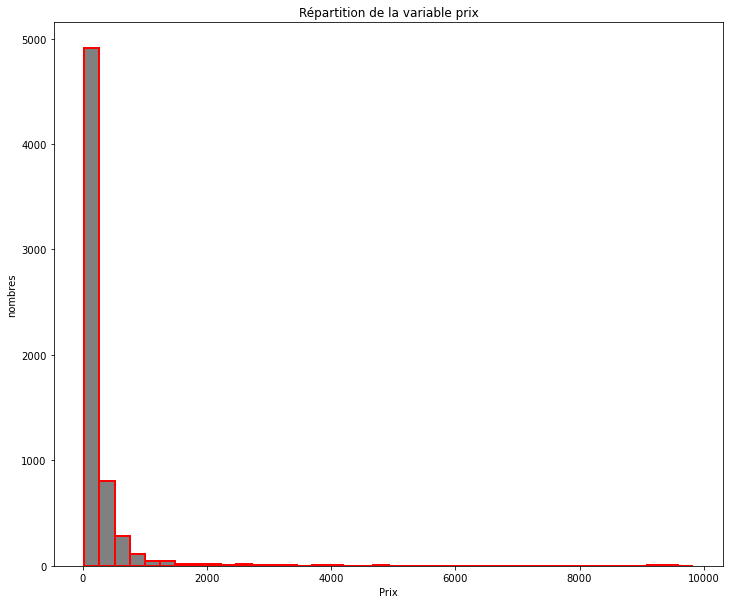

In [4]:
plt.figure(figsize=(12,10))
plt.hist(ml.Airbnb.Prix,lw=2, bins=40, color = 'grey',
            edgecolor = 'red')
plt.xlabel('Prix')
plt.ylabel('nombres')
plt.title('Répartition de la variable prix')

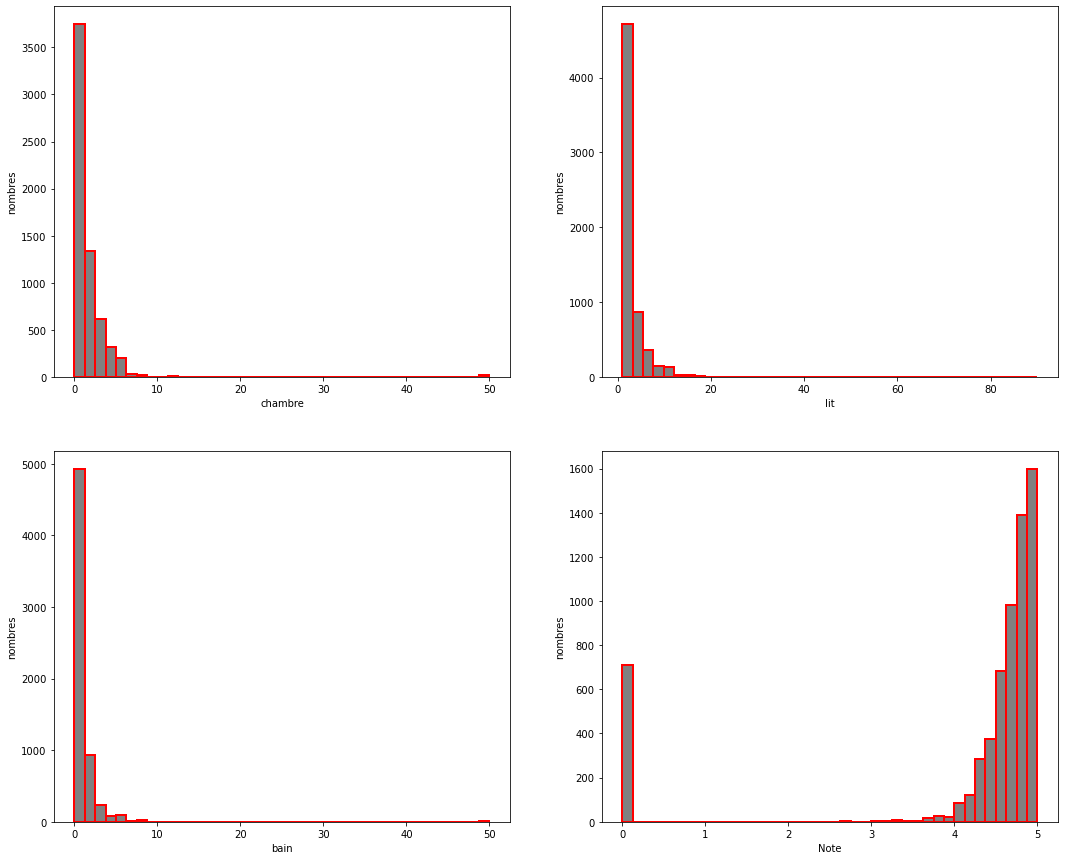

In [5]:
fig, reps = plt.subplots(nrows=2, ncols=2, figsize=(18, 15))
variable=["chambre","lit","bain","Note"]
for y in range(1,len(variable)+1):
    plt.subplot(2,2,y)
    plt.hist(ml.Airbnb[variable[y-1]],lw=2, bins=40, color = 'grey',
                edgecolor = 'red')
    plt.xlabel(variable[y-1])
    plt.ylabel('nombres')

In [6]:
print(ml.tbl)

In [7]:
print(ml.meilleur_modele.best_estimator_)

In [8]:
print(ml.best_t)

In [9]:
print(ml.t)

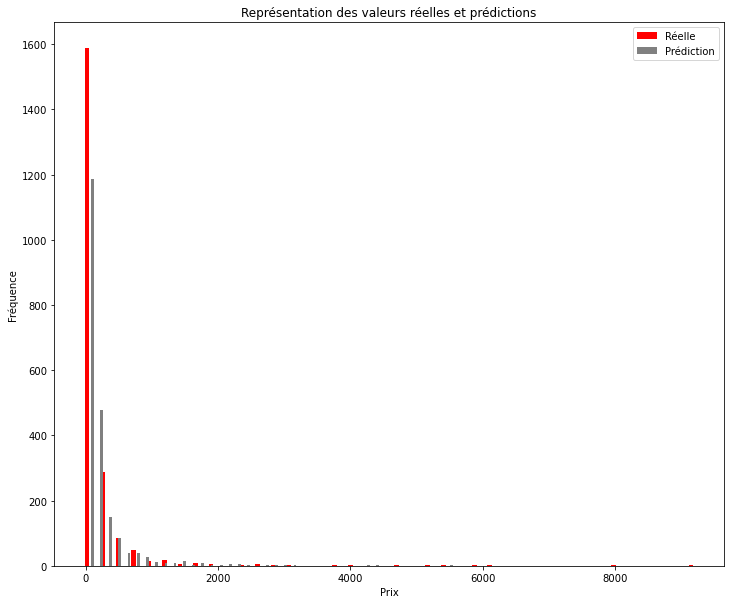

In [11]:
plt.figure(figsize=(12,10))
plt.hist(ml.true,align="left",bins=40, rwidth=0.3,color='red',label="Réelle")
plt.hist(ml.pred,align="mid",bins=40, rwidth=0.3,color='grey',label="Prédiction")
plt.title("Représentation des valeurs réelles et prédictions")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.legend()
plt.show()